# Assalam-o-alaikum

## Linear Regression from scratech

Before comming to this tutorial you may already know what is linear regression but for a reminder
> "A linear regression model describes the relationship between a dependent variable, y, and one or more independent variables, X."  

The dependent variable is also called the response variable. Independent variables are also called explanatory or predictor variables.

In [33]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Creating a dataset

In [34]:
data = {
    'Hours': [2.5, 5.1, 3.2, 8.5, 3.5, 1.5, 9.2, 5.5, 8.3, 2.7, 7.7, 5.9, 4.5, 3.3, 1.1, 8.9, 2.5, 1.9, 6.1, 7.4, 2.7, 4.8, 3.8, 6.9, 7.8],
    'Scores': [21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30, 24, 67, 69, 30, 54, 35, 76, 86]
}

df = pd.DataFrame(data)
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Dataset contains two column:

- Number of hour student studies
- Marks he gained

Our goal is to create a linear Regression model form the scratch and train it on this data and make predintion with using sklearn or any other machine learning library

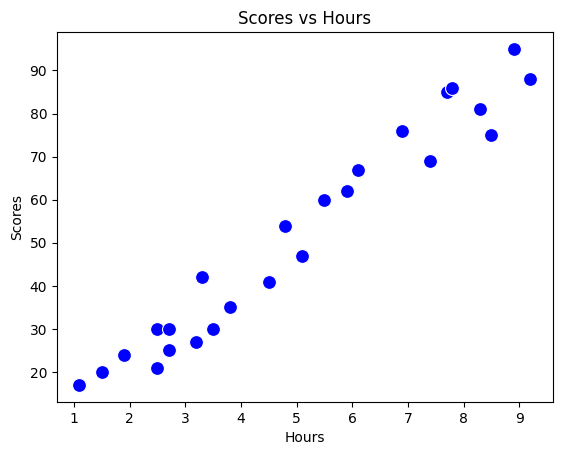

In [35]:
# Add a line (for example, a regression line)
sns.scatterplot(data=df, x='Hours', y='Scores', color='blue', s=100)
plt.title('Scores vs Hours')
plt.show()

We can observe a positive relation between Hours and Score. Now lets make a Linear Regression model on it and check hwo well our model performs

# Data Preprocession

In [36]:
x = df.Hours
y = df.Scores

# Creating Linear Regression model

In [37]:
# Defining a univariable Linear Regression model
def Linear_Regression_model(w,b,x):
    y_hat = np.dot(w,x) + b
    return y_hat

# Lets check our Univariable linear Regression model
Linear_Regression_model(11,3,6)

69

Here is the prediction of our linear regression model. now lets check the loss

In [38]:
# Defining the loss funtion for the Univariable Linear Regression model
def loss_function(w, b, x, y, Linear_Regression_model):
    
    y_hat = Linear_Regression_model(w, b, x)
    squared_error = (y_hat - y)**2
    loss = squared_error / 2

    return loss

# Lets check our loss funtion
loss_function(11,3,6,60, Linear_Regression_model)

40.5

Here is the loss of our model's prediction. Lets see if we can reduce it

In [51]:
# Here comes the most interesting part for which the machine learning is famous, learning the parametes through training
# The algorithm for training that we will create is gradient descent which will find the best values for parameter w adn b
# We can also select the learning rate
def gradient_descent(w,b,x,y,Linear_Regression_model, loss_function, learning_rate=0.01):
    dw = np.mean((Linear_Regression_model(w, b, x) - y) * x)
    db = np.mean(Linear_Regression_model(w, b, x) - y)
    
    # Update parameters
    w = w - learning_rate * dw
    b = b - learning_rate * db
    return w, b

# Lets check our Gradient descent whether it update the parameters or not
gradient_descent(11,3,6,60, Linear_Regression_model, loss_function)

(10.46, 2.91)

Here are the new w and b parameters that our model gave. Lets check if they decrease the loss

In [40]:
print('new loss for w=9.73 and b=2.955: ', loss_function(10.46,2.91,6,60, Linear_Regression_model))

new loss for w=9.73 and b=2.955:  16.07445000000001


Ooooh yeaaaaah. The loss decreased drastically. Our model passed the test

Now we have to compile all this so that we don't have to do every thing manually and it would iteratively learn and update the parameters

In [41]:
# Creating a compilation function
def train(x,y, Linear_Regression_model, loss_function, gradient_descent, interation=100, w=0, b=0, learning_rate=0.01):

    # Training loop
    for i in range(interation):
        w, b = gradient_descent(w,b,x,y, Linear_Regression_model, loss_function, learning_rate)
    
    return w, b

w_best, b_best = train(6,60, Linear_Regression_model, loss_function, gradient_descent, learning_rate=0.01)

Our model is now trained and it learned the parameters w_best and b_best. now lets make a prediction function to get predictions from our model

In [42]:
def predict(w, b, x):
    y_hat = Linear_Regression_model(w, b, x)
    return y_hat

for i in range(5):
    print(predict(w_best, b_best, i))

1.6216216216216213
11.351351351351349
21.081081081081077
30.810810810810807
40.54054054054053


Here are the predictions of our model.

Now lets train it on our actual dataset and check its predictions

In [43]:
w_best, b_best = train(x,y,Linear_Regression_model, loss_function, gradient_descent, interation = 2000, learning_rate=0.01)

Mean Absolute Error: 4.97


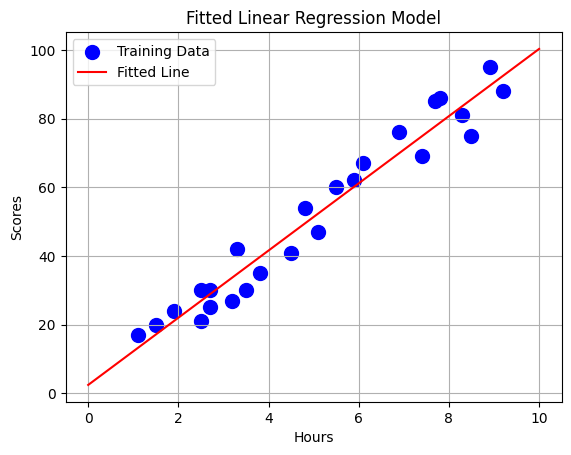

In [44]:
# Lets calculate the mean absolute error
mae = np.mean(np.abs(y - predict(w_best, b_best, x)))
print(f"Mean Absolute Error: {mae:.2f}")

# Ploting the training data points
plt.scatter(x, y, color='blue', label='Training Data', s=100)

# Ploting the fitted linear regression line
x_line = np.linspace(0, 10, 100)  # Generating x values for the line
y_line = w_best * x_line + b_best  # Calculating corresponding y values
plt.plot(x_line, y_line, color='red', label='Fitted Line')

# Adding labels and legend
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Fitted Linear Regression Model')
plt.legend()

plt.grid(True)
plt.show()

So this is our fitted model. As we can see it was a success.

Thanks for staying with me for this long.
Unitll next time.

Allah Hafiz